Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jan Wirth"
COLLABORATORS = "Björn Steinorth"

---

#  Einleitung
In dieser Aufgabe soll Ihr Verständnis von Sortieralgorithmen gestärkt werden. Stellen Sie sicher, dass sie das Archiv samt Test-Dateien heruntergeladen und in einen Unterordner `test_cases` extrahiert haben (Quelle: http://blog.quibb.org/2008/11/sort-optimization/). Öffnen Sie den Ordner und schauen Sie sich den Schema an, nachdem die Dateien benannt sind.




# Sortierverfahren implementieren (6⋅4 Pkt.)
Implementieren Sie folgende Sortieralgorithmen.

- Selectionsort
- Insertionsort
- Quicksort
- Bubblesort
- Mergesort
- Heapsort

Die Sortieralgorithmen sollen eine sortierte Kopie der ursprünglichen Liste zurück geben und das Original nicht verändern (damit das Verhalten kongruent zu `sorted()`) ist.


In [2]:
# -*- coding: utf-8 -*-
import sys

def selectionsort(data):
    data = data[:]
    for i in range (0,len(data)):
        kleinstes = data[i]
        for j in range (i, len(data)):
            if data[j] <= kleinstes:
                kleinstes = data[j]
                stelle = j
        temp = data[i]
        data[i] = data[stelle]
        data[stelle] = temp
    return data

def insertionsort(data):
    data = data[:]
    for i in range(1,len(data)):
        currentvalue = data[i]
        position = i
        while position>0 and data[position-1]>currentvalue:
            data[position]=data[position-1]
            position = position-1
        data[position]=currentvalue
    return data

def bubblesort(data):
    data = data[:]
    for i in range(0,len(data)-1):
        for j in range(0,len(data)-1-i):
            if data[j] >= data[j+1]:
                temp = data[j]
                data[j] = data[j+1]
                data[j+1] = temp
    return data
    

def quicksort(data):
    if len(data) < 1:
        return data
    pivot = data[0]
    left = []
    right = []
    for i in range (1,len(data)):
        if data[i] <= pivot:
            left.append(data[i])
        else:
            right.append(data[i])
    left = quicksort(left)
    right = quicksort(right)
    pivotelement = [pivot]
    return left + pivotelement + right 
    
class MaxHeap:
  def __init__(self, items=[]):
    super().__init__()
    self.heap = [0]
    for i in items:
      self.heap.append(i)
      self.__floatUp(len(self.heap) - 1)

  def push(self, data):
      self.heap.append(data)
      self.__floatUp(len(self.heap) - 1)

  def peek(self):
    if self.heap[1]:
      return self.heap[1]
    else:
      return None

  def pop(self):
    if len(self.heap) > 2: # more than one el in heap
      self.__swap(1, len(self.heap) - 1)
      max = self.heap.pop()
      self.__bubbleDown(1)
    elif len(self.heap) == 2: # only one element in heap
      max = self.heap.pop()
    else:
      max = None
    return max

  def __swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i] # destructuring assignment :) nice learning

  def __floatUp(self, index):
    parent = index // 2 # integer division
    if index <= 1:
      return
    elif self.heap[index] > self.heap[parent]:
      self.__swap(index, parent)
      self.__floatUp(parent) # recursion

  def __bubbleDown(self, index): # also 'maxHeapify'
    left = index * 2
    right = index * 2 + 1
    largest = index
    # prevent out of bounds exception and check
    # if index el is not the largest among it's children, swap with the largest child
    if len(self.heap) > left and self.heap[left] > self.heap[largest]:
      largest = left
    if len(self.heap) > right and  self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self.__swap(index, largest)
      self.__bubbleDown(largest)

def heapsort(arr):
  res = []
  m = MaxHeap(arr)
  el = m.pop()
  while el != None:
    res.append(el)
    el = m.pop()
  return list(reversed(res))

def _split(arr):
    return (arr[: len(arr) // 2], arr[len(arr) // 2 :])

def _merge(left, right):
    leftIndex = 0
    rightIndex = 0
    
    result = []
    
    while leftIndex < len(left) and rightIndex < len(right):
        if left[leftIndex] <= right[rightIndex]:
            result.append(left[leftIndex])
            leftIndex += 1
        else:
            result.append(right[rightIndex])
            rightIndex += 1
    
    if leftIndex < len(left):
        result.extend(left[leftIndex:])
    elif rightIndex < len(right):
        result.extend(right[rightIndex:])
        
    return result
    
def mergesort(arr):
    if arr is None:
        return None
    
    if len(arr) < 2:
        return arr
    
    left, right = _split(arr)
    
    return _merge(mergesort(left), mergesort(right))

print(mergesort(random.sample(range(100), 30)))

NameError: name 'random' is not defined

In [ ]:
import random

SAMPLE_LIST = random.sample(range(100), 30)

def test_algorithm(algorithm):
    sample_list = SAMPLE_LIST[:]
    assert algorithm(sample_list) == sorted(sample_list), "{} did not sort the list".format(algorithm.__name__)
    assert sample_list == SAMPLE_LIST, "{} altered the original".format(algorithm.__name__)

In [ ]:
test_algorithm(selectionsort)

In [ ]:
test_algorithm(insertionsort)

In [ ]:
test_algorithm(bubblesort)

In [ ]:
test_algorithm(quicksort)

In [ ]:
test_algorithm(heapsort)

In [ ]:
test_algorithm(mergesort)

# Einlesen von Dateien (4 Pkt.)
Schreiben sie eine Funktion `load_test_cases(path)`, die zu den zur Verfügung gestellten Testfällen jeweils die Datei mit 10e3 Einträgen lädt.

In [ ]:
from os import walk

x = 1000
TEST_CASE_PATH = "test_files"

def load_test_cases(path):
    test_cases = {}
    for root, dirs, files in walk(path):
        for filename in files:
            if filename.endswith("10000.txt"):
                with open(root + "/" + filename) as f:
                    test_cases[filename[:-10]] = f.read().splitlines()
    return test_cases

print(load_test_cases(TEST_CASE_PATH).keys())


In [ ]:
import unittest

unittest_test_case = unittest.TestCase('__init__')

loaded_test_cases = load_test_cases(TEST_CASE_PATH)
available_test_cases = ['1245.repeat', 'end.0', 'identical', 'med.3.killer', 'rand.dups', 'rand.no.dups', 'rand.steps', 
                        'rev.ends', 'rev.partial', 'rev.saw', 'reverse', 'seq.0.is.1000', 'seq.partial', 'seq.saw', 'sequential']

unittest_test_case.assertCountEqual(loaded_test_cases.keys(), available_test_cases)

for key, value in loaded_test_cases.items():
    assert len(value) == 10e3, "Number of testcases mismatch for {}".format(key)

# Sortierverfahren testen (12 Pkt.)
 Vergleichen Sie die Sortierverfahren untereinander und mit der Python Funktion `sorted()`
 - Benutzen sie `result = %timeit -n 100 -r 3 -o` um die Ausführung zu messen und das Ergebnis in einer Variablen speichern zu können. Auf das beste Ergebnis können Sie mit `result.best` zugreifen.
 - Gruppieren Sie die Ergebnisse nach Testfall.
 - Testen sie folgende „Splices“ Ihres Testdatensatzes: `x_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`
 - Stellen sie die Ergebnisse mittels Tabelle und Graphen mit Titel und Achsenbeschriftung dar (Matplotlib).
 - Bewerten Sie das Ergebnis

<IPython.core.display.Javascript object>


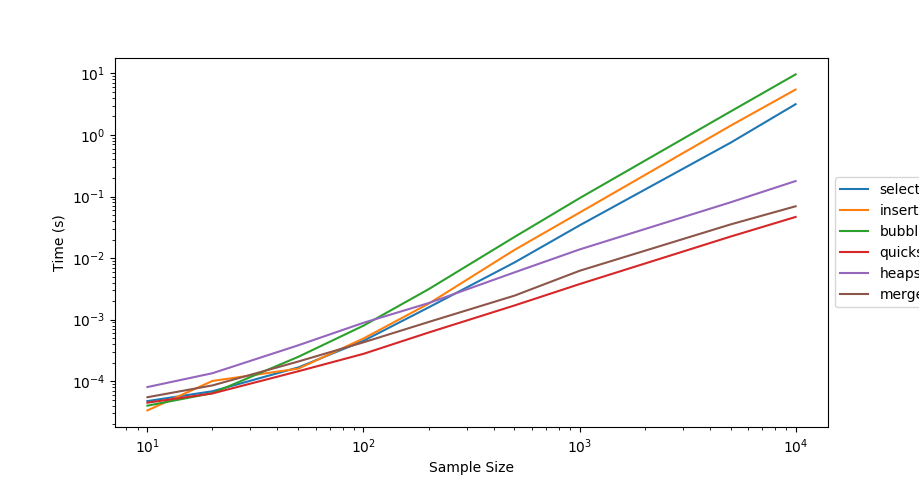

47.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
68.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
167 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
452 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8.48 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
748 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
33.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
160 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
493 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.81 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
13.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
54.7 ms ± 0 ns per loop (mean ± 

<IPython.core.display.Javascript object>


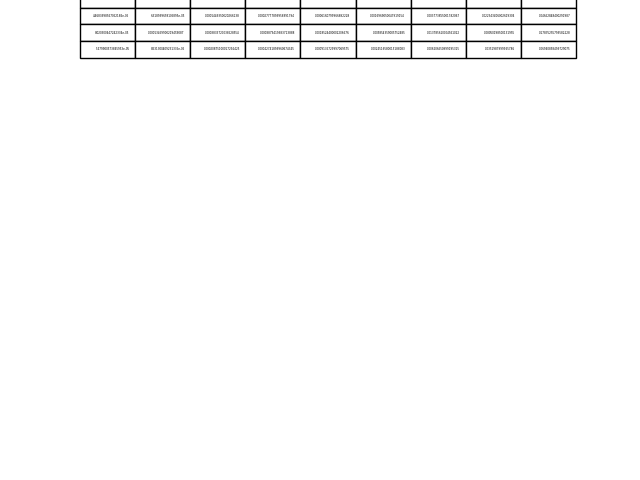

In [75]:
# for quicksort
%matplotlib notebook

import matplotlib.pyplot as plt
from functools import reduce

import sys
import random
sys.setrecursionlimit(20000)

algos_to_measure = {
    "sorted": sorted,
    "selectionsort": selectionsort,
    "insertionsort": insertionsort,
    "bubblesort": bubblesort,
    "quicksort": quicksort,
    "heapsort": heapsort,
    "mergesort": mergesort
}

x_values = [10, 20, 50, 100, 200, 500, 1000, 5000, 10000]

def measure(algo, sample_count):
    res = %timeit -n 1 -r 1 -o algo(random.sample(range(sample_count), sample_count))
    return res

# average of list of numbers
def avg(l):
    return reduce(lambda x, y: x + y, l) / len(l)

def init_plot():
    plt.figure("Results")
    plt.xlabel("Sample Size")
    plt.ylabel("Time (s)")
    plt.xticks(x_values)
    plt.loglog()
    return plt

def init_table(rows):
    plt.figure("Results - Tabular")
    axTable1 = plt.axes(frameon =False)
    axTable1.axes.get_xaxis().set_visible(False)
    axTable1.axes.get_yaxis().set_visible(False)
    return plt.table(cellText=rows,
                     colLabels=x_values,
                      loc='top')

def run():
    plt = init_plot()
    rows = []
    for algo_name, algo in algos_to_measure.items():
        algo_results = []
        for x in x_values:
            algo_results.append(measure(algo, x))
        row = [measurement.best for measurement in algo_results]
        plt.plot(x_values,row , label = algo_name)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        rows.append(row)
    init_table(rows)

run()
        